<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data</a></span></li><li><span><a href="#Test-Plots-and-Smoothing" data-toc-modified-id="Test-Plots-and-Smoothing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test Plots and Smoothing</a></span></li><li><span><a href="#Demo-of-Baseline-Subtraction-(Polynomial-Baseline)" data-toc-modified-id="Demo-of-Baseline-Subtraction-(Polynomial-Baseline)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Demo of Baseline Subtraction (Polynomial Baseline)</a></span><ul class="toc-item"><li><span><a href="#Customising-baseline" data-toc-modified-id="Customising-baseline-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Customising baseline</a></span></li></ul></li><li><span><a href="#Fitting-Functions" data-toc-modified-id="Fitting-Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fitting Functions</a></span></li><li><span><a href="#Running-curve-fits" data-toc-modified-id="Running-curve-fits-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Running curve fits</a></span><ul class="toc-item"><li><span><a href="#Select-initial-guess-parameters,-namely-amplitude,-centre,-width-of-the-peaks." data-toc-modified-id="Select-initial-guess-parameters,-namely-amplitude,-centre,-width-of-the-peaks.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Select initial guess parameters, namely amplitude, centre, width of the peaks.</a></span></li><li><span><a href="#Performing-Fitting" data-toc-modified-id="Performing-Fitting-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performing Fitting</a></span></li><li><span><a href="#Plotting-of-fits" data-toc-modified-id="Plotting-of-fits-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Plotting of fits</a></span></li><li><span><a href="#Plotting-of-Area-under-Peaks-for-each-Spectrum" data-toc-modified-id="Plotting-of-Area-under-Peaks-for-each-Spectrum-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Plotting of Area under Peaks for each Spectrum</a></span></li></ul></li></ul></div>

# Import Data

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import collections
from lmfit import Minimizer, Parameters, report_fit
from lmfit.lineshapes import gaussian, lorentzian
from scipy import integrate
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('test_raman.csv')

df

,-10.851900,-6.274923,-1.704478,2.868041,7.434036,11.999957,16.561510,21.120845,25.677963,30.232866,...,3475.377090,3478.015879,3480.650905,3483.285022,3485.919658,3488.549110,3491.180507,3493.809573,3496.436311,3499.064992
0,249.0,1406.0,2913.0,1684.0,357.0,40.0,31.0,40.0,4.0,-38.0,...,76.0,67.0,46.0,78.0,60.0,101.0,-9.0,43.0,59.0,8.0
1,357.0,1493.0,3181.0,1762.0,439.0,28.0,-3.0,20.0,-18.0,23.0,...,98.0,51.0,76.0,68.0,64.0,44.0,26.0,28.0,65.0,34.0
2,375.0,1448.0,3003.0,1735.0,445.0,25.0,-8.0,22.0,-3.0,-20.0,...,97.0,94.0,49.0,75.0,74.0,29.0,59.0,28.0,33.0,42.0
3,378.0,1540.0,2924.0,1730.0,384.0,-13.0,-3.0,0.0,-24.0,-28.0,...,91.0,39.0,90.0,57.0,73.0,13.0,7.0,53.0,56.0,37.0
4,292.0,1509.0,2909.0,1767.0,455.0,36.0,43.0,46.0,30.0,-28.0,...,82.0,56.0,42.0,74.0,71.0,75.0,35.0,27.0,66.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,331.0,1186.0,2549.0,1976.0,426.0,-10.0,54.0,30.0,15.0,-19.0,...,101.0,66.0,12.0,67.0,35.0,0.0,50.0,0.0,64.0,-18.0
196,358.0,1189.0,2516.0,1893.0,463.0,21.0,55.0,-11.0,-25.0,-21.0,...,84.0,58.0,31.0,62.0,43.0,67.0,-3.0,23.0,39.0,21.0
197,341.0,1121.0,2566.0,1935.0,426.0,28.0,18.0,-8.0,-21.0,-51.0,...,102.0,71.0,47.0,69.0,53.0,20.0,39.0,7.0,72.0,86.0
198,303.0,1208.0,2551.0,1880.0,409.0,13.0,40.0,40.0,-24.0,-70.0,...,92.0,29.0,48.0,82.0,39.0,15.0,33.0,53.0,63.0,17.0


In [3]:
df3 = df.iloc[:, 370:430]
# Define df3 as the relevant region of the spectra to monitor, in this case, the styrene vinyl peak region.

In [4]:
df3.head()
# Check that the dataframe indeed contains the styrene vinyl peak region; from 1500 cm-1 to 1714 cm-1.

,1511.121206,1514.812005,1518.499410,1522.187054,1525.871307,1529.553986,1533.235093,1536.912815,1540.590780,1544.265364,...,1693.160058,1696.750286,1700.335448,1703.920882,1707.504810,1711.085457,1714.666376,1718.242243,1721.816611,1725.391254
0,231.0,242.0,278.0,269.0,265.0,241.0,273.0,332.0,313.0,340.0,...,187.0,132.0,210.0,193.0,217.0,195.0,222.0,148.0,222.0,164.0
1,230.0,234.0,221.0,236.0,210.0,299.0,222.0,300.0,315.0,375.0,...,221.0,162.0,131.0,211.0,210.0,180.0,220.0,197.0,164.0,141.0
2,201.0,200.0,205.0,211.0,241.0,242.0,280.0,245.0,276.0,312.0,...,207.0,185.0,215.0,137.0,232.0,153.0,243.0,154.0,166.0,99.0
3,129.0,207.0,283.0,244.0,263.0,255.0,283.0,271.0,268.0,296.0,...,216.0,165.0,153.0,155.0,222.0,166.0,256.0,126.0,179.0,113.0
4,210.0,161.0,251.0,270.0,288.0,215.0,208.0,249.0,272.0,356.0,...,194.0,190.0,175.0,152.0,165.0,191.0,216.0,147.0,189.0,117.0


# Test Plots and Smoothing

In [5]:
df3.columns # df3.columns is of type: pandas.core.indexes.numeric.Float64Index
# Float64Index is an immutable ndarray implementing an ordered, sliceable set. The basic object storing axis labels for all
# pandas objects. Float64Index is a special case of Index with purely float labels. 

Index(['1511.121206', '1514.812005', '1518.499410', '1522.187054',
       '1525.871307', '1529.553986', '1533.235093', '1536.912815',
       '1540.590780', '1544.265364', '1547.936571', '1551.608023',
       '1555.274293', '1558.940809', '1562.605763', '1566.265545',
       '1569.927380', '1573.585853', '1577.240965', '1580.894524',
       '1584.548332', '1588.196985', '1591.844088', '1595.491443',
       '1599.133651', '1602.776112', '1606.415231', '1610.052807',
       '1613.688842', '1617.321540', '1620.954495', '1624.582323',
       '1628.210409', '1631.835168', '1635.460186', '1639.080089',
       '1642.698462', '1646.318886', '1649.932413', '1653.544416',
       '1657.158469', '1660.765636', '1664.373069', '1667.978981',
       '1671.581589', '1675.184462', '1678.782252', '1682.380309',
       '1685.975071', '1689.568320', '1693.160058', '1696.750286',
       '1700.335448', '1703.920882', '1707.504810', '1711.085457',
       '1714.666376', '1718.242243', '1721.816611', '1725.3912

In [6]:
df3.columns = df3.columns.map(float)
df3.columns
# Change df3.columns from string to float.


Float64Index([1511.121206, 1514.812005,  1518.49941, 1522.187054, 1525.871307,
              1529.553986, 1533.235093, 1536.912815,  1540.59078, 1544.265364,
              1547.936571, 1551.608023, 1555.274293, 1558.940809, 1562.605763,
              1566.265545,  1569.92738, 1573.585853, 1577.240965, 1580.894524,
              1584.548332, 1588.196985, 1591.844088, 1595.491443, 1599.133651,
              1602.776112, 1606.415231, 1610.052807, 1613.688842,  1617.32154,
              1620.954495, 1624.582323, 1628.210409, 1631.835168, 1635.460186,
              1639.080089, 1642.698462, 1646.318886, 1649.932413, 1653.544416,
              1657.158469, 1660.765636, 1664.373069, 1667.978981, 1671.581589,
              1675.184462, 1678.782252, 1682.380309, 1685.975071,  1689.56832,
              1693.160058, 1696.750286, 1700.335448, 1703.920882,  1707.50481,
              1711.085457, 1714.666376, 1718.242243, 1721.816611, 1725.391254],
             dtype='float64')

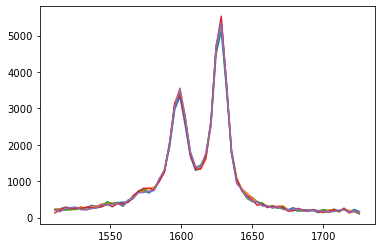

In [7]:
%matplotlib inline
# Plot figure to see whether the spectral features of the styrene vinyl peak is there.
for x,y in df3.head().iterrows():
    # x would be the row index which ranges from 0 to 4 since there are only 5 rows of data. y would be a Series with values
    # as the intensities and the column indexes (labels) as the wavenumbers. Therefore, we have x as the spectral index
    # (row index of dataframe) and y, in which within y itself contains the intensity value (y-axis) at the corresponding
    # wavenumber (x-axis).
    
    plt.plot(df3.columns, y)
    # Overlay of the 5 rows of df3 in the spectral region of interest.
    
plt.savefig('lol', dpi = 300, figsize = (5,5))

# Demo of Baseline Subtraction (Polynomial Baseline)

## Customising baseline

Choose two regions on the spectrum that you want to form the basis for the baseline. The spectrum is based on the truncated region of interest from the raw spectrum.

Choose from the curve above, <10 and >50 to form the x and y values to fit a polynomial line, serving as my baseline values. **Note that the x-axis is the placeholder index location of the truncated spectra, not the actual wavenumbers themselves**

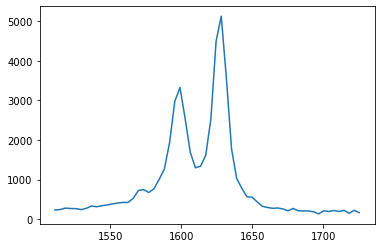

In [33]:
y = df3.iloc[0,:]
plt.plot(y)
# y is a Series. Therefore, a single argument of y, itself containing the intensity value (y-axis) at the corresponding
# wavenumber (x-axis) can be plotted.

# Plot the 1st spectra (1st row) of df3.

In [34]:
xbl = [] # x-baseline.

for items in y[:1535].index.values.tolist():
    xbl.append(items)

for items in y[1680:].index.values.tolist():
    xbl.append(items)

# Recall that y is a Series with intensities labelled by their wavenumbers. We can select the wavenumbers of interest here.
# Convert the index object to a numpy array. We repeat for the intensities as well.

ybl = [] # y-baseline.

for items in y[:1535].values.tolist():
    ybl.append(items)

for items in y[1680:].values.tolist():
    ybl.append(items)
    
# y is a Pandas Series. Therefore, y.values immediately gives the values witihn that series, which are the intensities.

Running the baseline fit. **(x-values, y-values, polynomial degree)** are the arguments.

In [35]:
blpars = np.polyfit(xbl, ybl, 1)
# blpars contains the baseline parameters; the coefficients which will allow for the baseline polynomial to be defined.
# Fit a polynomial based on the x and y-values chosen for the spectra during the previous step. Thus, given a list of x values
# and its corresponding y-values, fit a polynomial through these points as best as you can. This polynomial will serve as the 
# baseline to be subtracted from the spectra's y-values. 
# numpy.polyfit(x, y, deg)
# np.polyfit: Least squares polynomial fit. Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y).
# Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
# Since degree = 1, we are fitting a straight line.

blfit = np.poly1d(blpars)
# A one-dimensional polynomial class. A convenience class, used to encapsulate “natural” operations on polynomials so that
# said operations may take on their customary form in code. blfit is a function that encompasses information on blpar's vector
# of coefficients derived from the np.polyfit step. It will take an input of x-values, then apply the coefficients to the
# x-values to obtain the best fit polynomial following the p(x) equation defined above.

Plot showing before and after subtraction.

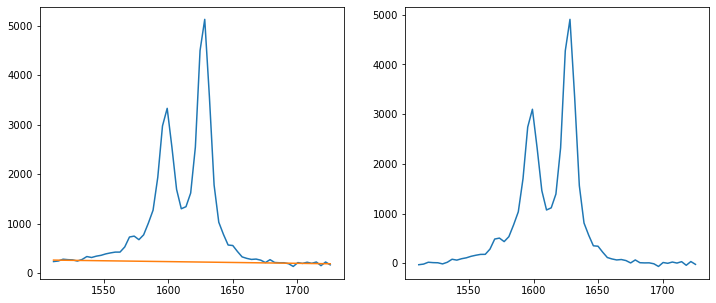

In [36]:
plt.figure(figsize = (12,5))

plt.subplot(1,2,1) # subplot(nrows, ncols, index)
plt.plot(y) # Plot the spectrum using the Series y.
plt.plot(y.index, blfit(y.index))
# Plot the baseline polynomial to be subtracted (orange color). The x-axis will contain the wavenumbers. 
# Therefore y.index(Series labels) is being plotted at the x-axis. The y-axis will be blfit(y.index) because the output of 
# blfit(y.index) contains the y-values of the polynomial that is best fit to the input x-values.

plt.subplot(1,2,2)
plt.plot(y.index,(y - blfit(y.index)))
# Plot the baseline corrected spectrum. Subtraction can immediately be done because blfit(y.index) is a numpy array of y-values
# of the best fit polynomial. So the each value in Series y will minus each value in array blfit(y.index),
# to yield a final y value, which is the corrected spectra intensity. 

plt.show()

# Fitting Functions

In [7]:
def residuals(pars,x,y):
    
    model =  (lorentzian(x, pars['ampL1'], pars['cenL1'], pars['widL1']) +
              lorentzian(x, pars['ampL2'], pars['cenL2'], pars['widL2']))
    
    return model - y

# Running curve fits

I chose only 100 rows to iterate over here so that my computer don't take too long to run the code. You can choose all if you want to.

In [29]:
df_ = df3.copy()
df_ = df_.head(50)

For 2 Lorentzians peak fits within the region of interest:

## Select initial guess parameters, namely amplitude, centre, width of the peaks.

In [30]:
ampL1 = 3000 # Peak Amplitude of 1st Peak
cenL1 = 1590 # Peak location of 1st Peak
widL1 = 5

ampL2 = 5000 # Peak Amplitude of 2nd Peak
cenL2 = 1630 # Peak location of 2nd Peak
widL2 = 5

## Performing Fitting

In [31]:
de = collections.deque([])
best_fits = collections.deque([])
y_values = collections.deque([])

pbar = tqdm(total = len(df_), dynamic_ncols  = True, desc = 'Fitting curves')

pfit = Parameters()
pfit.add(name='ampL1', value = ampL1, min = 0)
pfit.add(name='ampL2', value = ampL2, min = 0)
pfit.add(name='cenL1', value = cenL1)
pfit.add(name='peak_split', value=20, min=10, max=50, vary=True)
pfit.add(name='cenL2', expr='peak_split+cenL1')
pfit.add(name='widL1', value = widL1, min = 0)
pfit.add(name='widL2', value = widL2, min = 0)

for _,item in df_.iterrows():
    
    x = df_.columns # Wavenumbers
    
    y = item # Intensities
    
    xbl = []

    for items in y[:1535].index.values.tolist():
        xbl.append(items)

    for items in y[1680:].index.values.tolist():
        xbl.append(items)


    ybl = []

    for items in y[:1535].values.tolist():
        ybl.append(items)

    for items in y[1680:].values.tolist():
        ybl.append(items)
    
    blpars = np.polyfit(xbl, ybl, 1)
    blfit = np.poly1d(blpars)
    
    y -= blfit(x) # Corrected Intensities
    y_values.append(y)

    mini = Minimizer(residuals, pfit, fcn_args=(x, y))
    out = mini.leastsq()
    best_fit = y + (out.residual)
    best_fits.append(best_fit)
    
    fit_params = out.params.valuesdict()
    fit_params['R2'] = r2_score(y,best_fit)
    fit_params['FWHM_L1'] = 2*out.params.valuesdict()['widL1']
    fit_params['FWHM_L2'] = 2*out.params.valuesdict()['widL2']
    fit_params['Height_L1'] = 0.3183099*out.params.valuesdict()['ampL1']/max(2.220446049250313e-16, out.params.valuesdict()['widL1'])
    fit_params['Height_L2'] = 0.3183099*out.params.valuesdict()['ampL2']/max(2.220446049250313e-16, out.params.valuesdict()['widL2'])
    
    
    de.append(fit_params)
    pbar.update(1)

pbar.close()
    
results = pd.DataFrame(de)
results

,ampL1,ampL2,cenL1,peak_split,cenL2,widL1,widL2,R2,FWHM_L1,FWHM_L2,Height_L1,Height_L2
0,64716.714622,84793.837097,1598.047576,29.310850,1627.358426,6.924340,5.363667,0.994275,13.848681,10.727334,2975.008453,5032.138789
1,70302.782935,87796.071082,1598.189445,29.240776,1627.430221,6.960817,5.241612,0.993996,13.921635,10.483223,3214.862654,5331.634747
2,69994.977976,88081.178147,1598.239052,29.129632,1627.368684,7.182710,5.329503,0.993969,14.365419,10.659007,3101.906648,5260.736081
3,68658.991576,87750.374945,1597.956115,29.435786,1627.391900,7.059710,5.155574,0.993421,14.119420,10.311149,3095.713058,5417.788908
4,70433.463101,87462.906646,1598.264895,29.086456,1627.351351,7.091108,5.240213,0.993579,14.182216,10.480426,3161.659514,5312.819886
5,69854.895886,85785.643263,1597.996692,29.271634,1627.268326,7.215726,5.130265,0.993814,14.431453,10.260531,3081.533805,5322.613367
6,71124.060779,87932.014862,1598.074329,29.315713,1627.390042,7.093580,5.077471,0.993409,14.187161,10.154941,3191.546604,5512.514580
7,70016.926339,88094.527281,1598.045437,29.316608,1627.362045,7.263131,5.265254,0.993634,14.526262,10.530508,3068.522557,5325.737574
8,67856.134607,87443.491040,1598.138181,29.300361,1627.438542,7.107519,5.219257,0.994200,14.215039,10.438515,3038.933609,5332.967189
9,70940.545305,88400.762534,1597.890653,29.485170,1627.375823,7.119582,5.111350,0.993126,14.239164,10.222700,3171.685908,5505.167612


For 2 Lorentzians peak fits within the region of interest:

## Plotting of fits

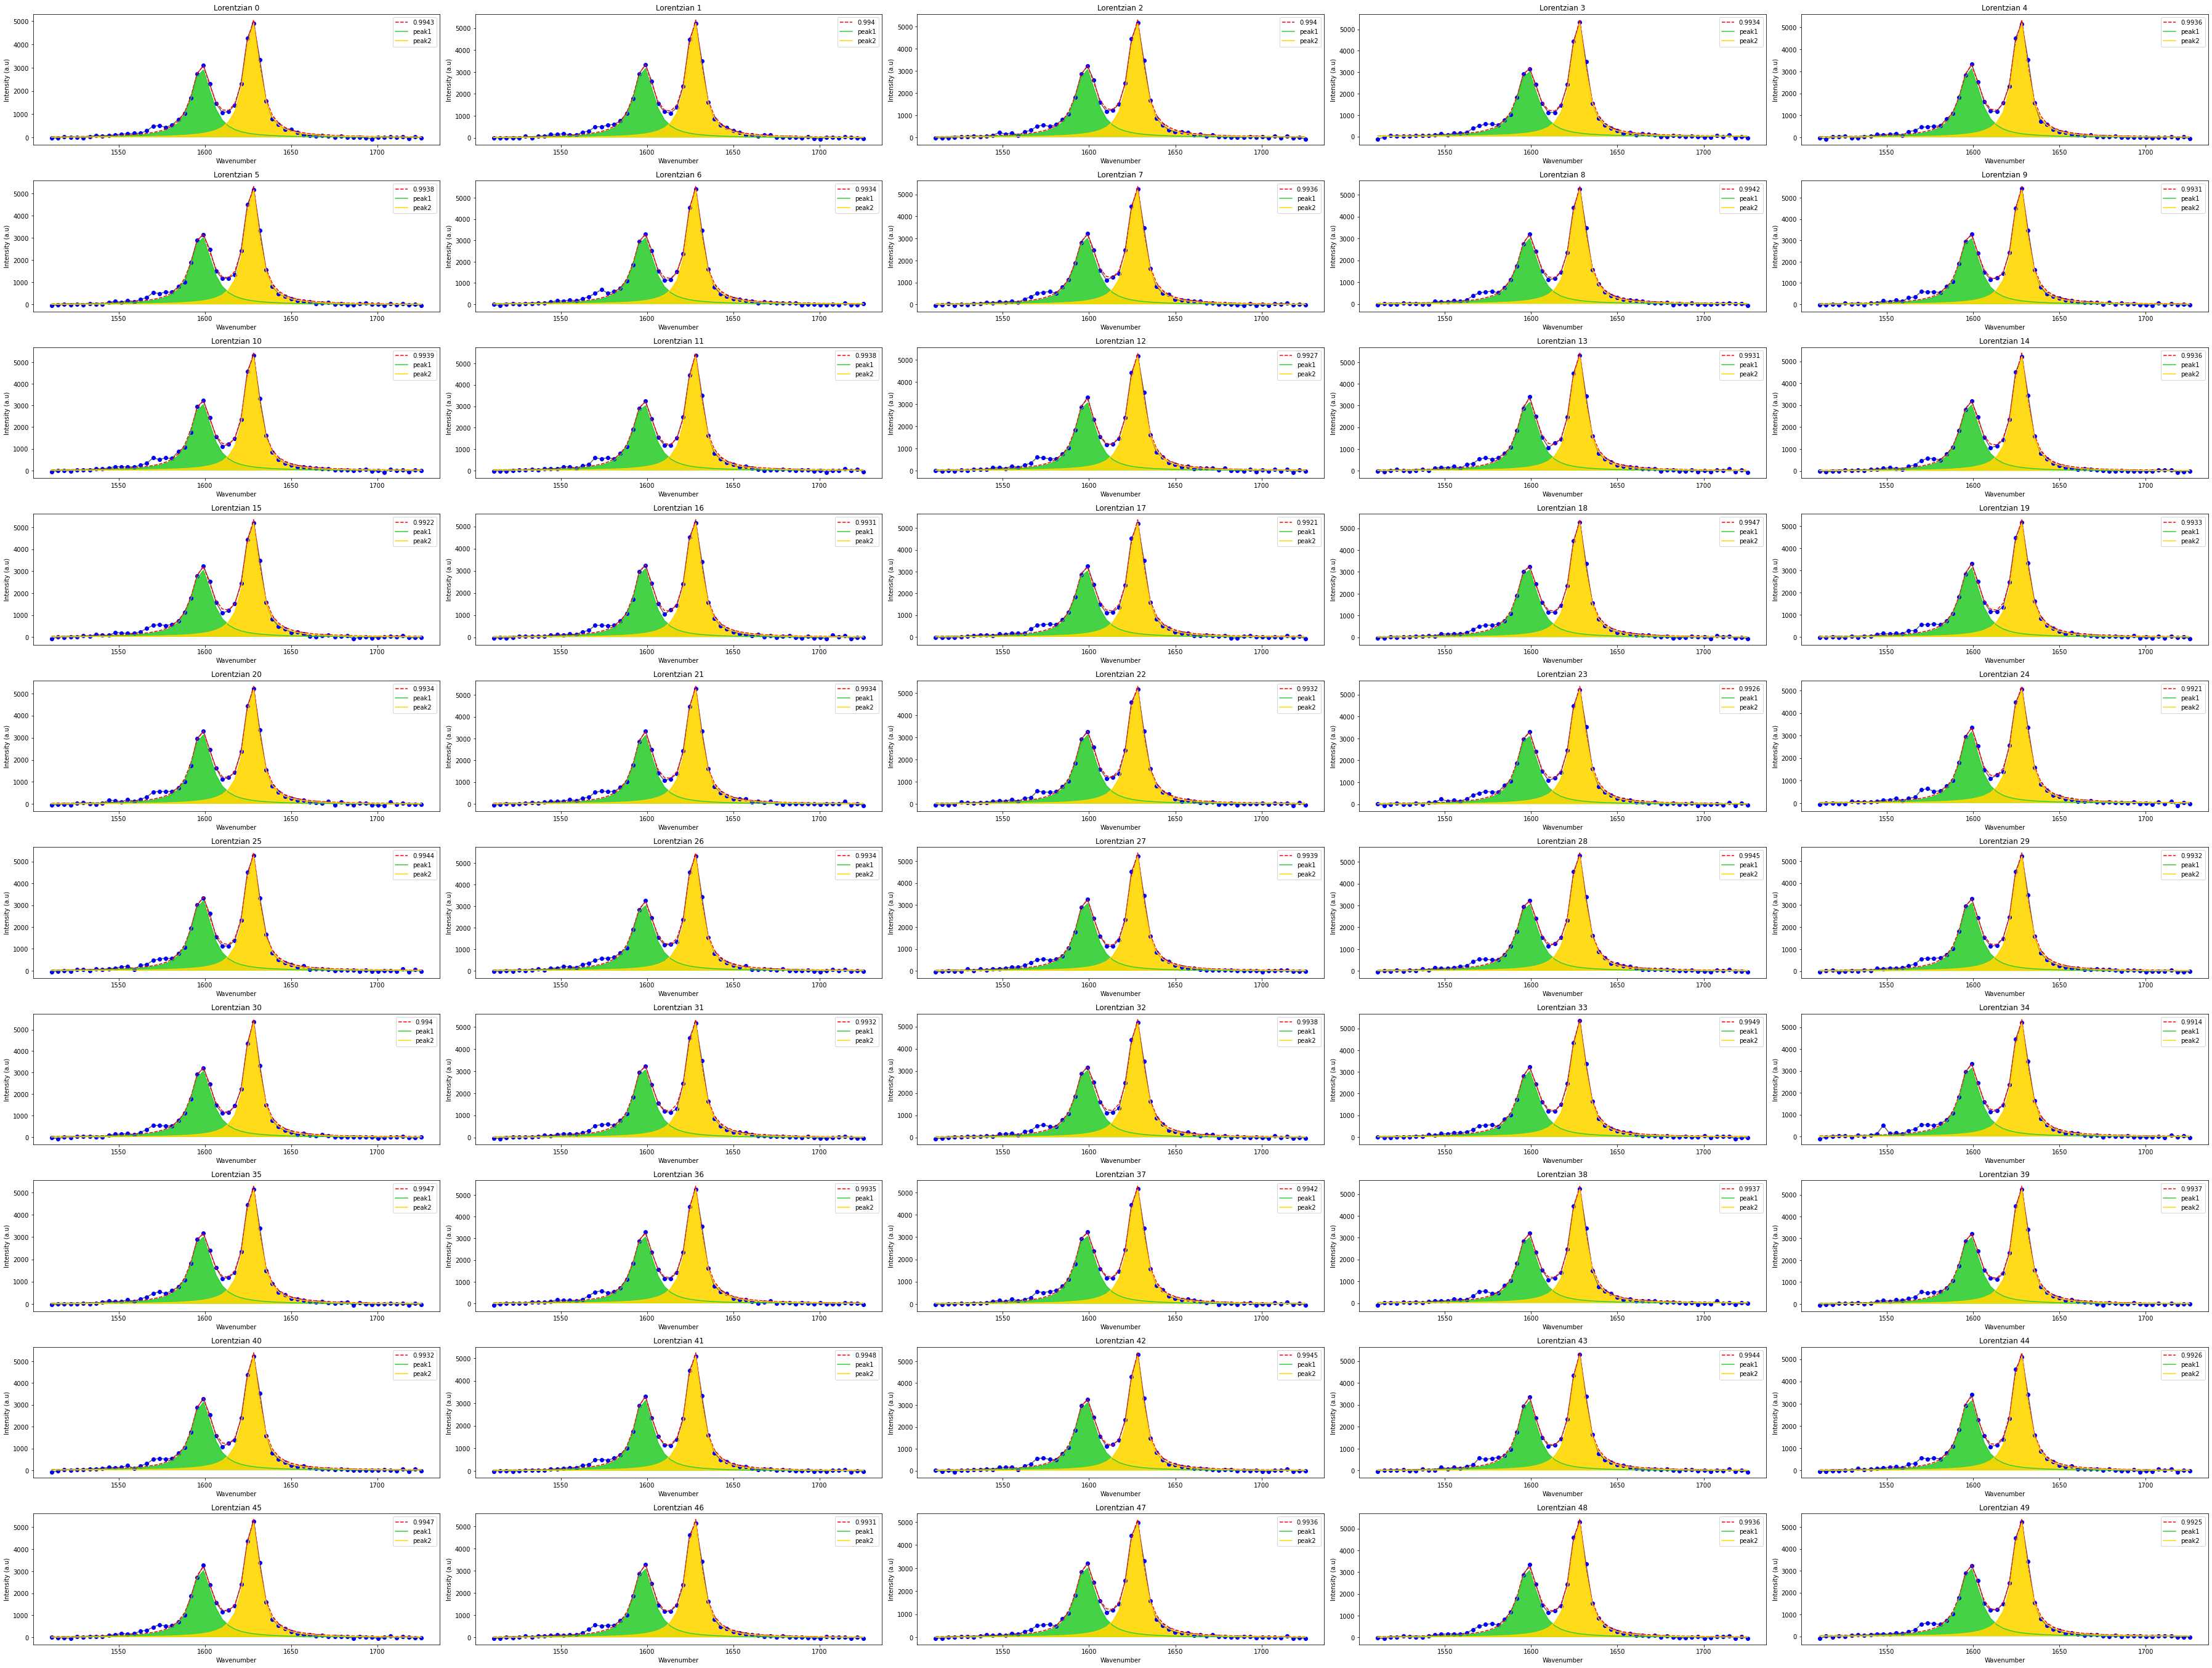

In [32]:
# We calculate the area under curve here as well.

Area_1 = collections.deque([])
Area_2 = collections.deque([])

plt.figure(figsize = (50,150))

pbar = tqdm(total = len(df_), dynamic_ncols  = True, desc = 'Plotting curves')

for i in range(len(results)):

    peak1 = lorentzian(x,results.loc[i,'ampL1'],
                         results.loc[i,'cenL1'],
                         results.loc[i,'widL1'])
    peak2 = lorentzian(x,results.loc[i,'ampL2'],
                         results.loc[i,'cenL2'],
                         results.loc[i,'widL2'])
    
    # change layout if you want
    plt.subplot(40,5,(1+i))

    plt.title('Lorentzian ' + str(i))

    plt.xlabel('Wavenumber')

    plt.ylabel('Intensity (a.u)')

    plt.plot(x, y_values[i], '#606060')
    
    plt.plot(x, y_values[i], 'bo')
    plt.plot(x, best_fits[i], 'r--', label = str(results.loc[i,'R2'].round(decimals = 4)))
    plt.plot(x, peak1,'#32CD32', label = 'peak1')
    plt.fill_between(x, peak1.min(),
                     peak1,
                    facecolor = '#32CD32', alpha = 0.9)
    
    plt.plot(x, peak2,'#FFD700', label = 'peak2')
    plt.fill_between(x, peak2.min(),
                     peak2,
                    facecolor = '#FFD700', alpha = 0.9)
    
    plt.legend(loc='best')
   
    
    Area_1.append(integrate.simps(peak1, x)) 
    Area_2.append(integrate.simps(peak2, x))
    
    pbar.update(1)
    
pbar.close()
plt.tight_layout()
plt.show()

## Plotting of Area under Peaks for each Spectrum

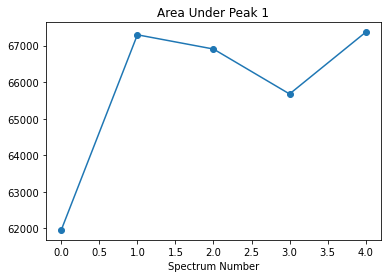

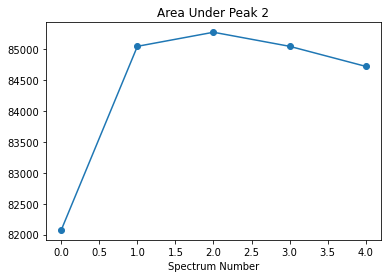

In [12]:
plt.plot(Area_1)
plt.scatter(range(len(Area_1)), Area_1)
plt.title('Area Under Peak 1')
plt.xlabel('Spectrum Number')
plt.show()
plt.plot(Area_2)
plt.scatter(range(len(Area_2)), Area_2)
plt.title('Area Under Peak 2')
plt.xlabel('Spectrum Number')
plt.show()